# Izhikevich Neuron Model:

### System of Equations:
$$v' = 0.04v^2 + 5v  +140 - u + I$$
$$u' = a(bv - u)$$
<div style="text-align: center;">
If $ v = 30mV $ Then $ v = c $ and $ u = u + d $
</div>

### Significance of variables/parameters:
- **u**: represents the membrane recovery variable.
- **v**: represents the membrane potential of the neuron.
- **I**: External current input.
- **a**: represents time scale of **u**.
- **b**: represents the sensitivity of **u** to the fluctuations of **v**.
- **c**: represents the after-spike reset value of **v**.
- **d**: represents the after-spike reset value of **u**.

### Note - Property of params:
- For Regular Spiking:  
  - $ c, d = -65mV, 8 $
- For Intrinsic Bursting:
  - $ c, d = -55mV, 4 $

### Setup:

In [22]:
import numpy as np
from random import seed, random
import matplotlib.pyplot as plt

def simulate_neuron(c, d, I):
    seed(9)
    r = random()
    
    # random fluctuation corresponding to excitatory neurons
    c, d = c + 15 * r**2, d - 6 * r**2 
    v, u = -65, b * (-65)
    
    v_arr, u_arr = [], []
    # Simulation loop
    for t_idx, t in enumerate(time):
        current_I = I[t_idx]

        v += dt * (0.04 * v**2 + 5 * v + 140 - u + current_I)
        u += dt * a * (b * v - u)
        if v >= 30:  # spike condition
            v = c  # reset membrane potential
            u += d  # reset recovery variable

        # Record values
        v_arr.append(v)
        u_arr.append(u)
    return v_arr, u_arr

### Defining parameters and input current:

In [23]:
# Parameters
a, b = 0.002, 0.158
    
# Simulation parameters
dt = 0.1  # time step
time = np.arange(0, 210, dt)  # total time from 0 to 100 ms
I = np.zeros_like(time)
I[(time >= 15.1) & (time <= 200)] = 10 # Set I to 10 constant input

### Simulation of the system of linear differential equations:
- Regular Firing and Intrinsic Bursting, for step current input.

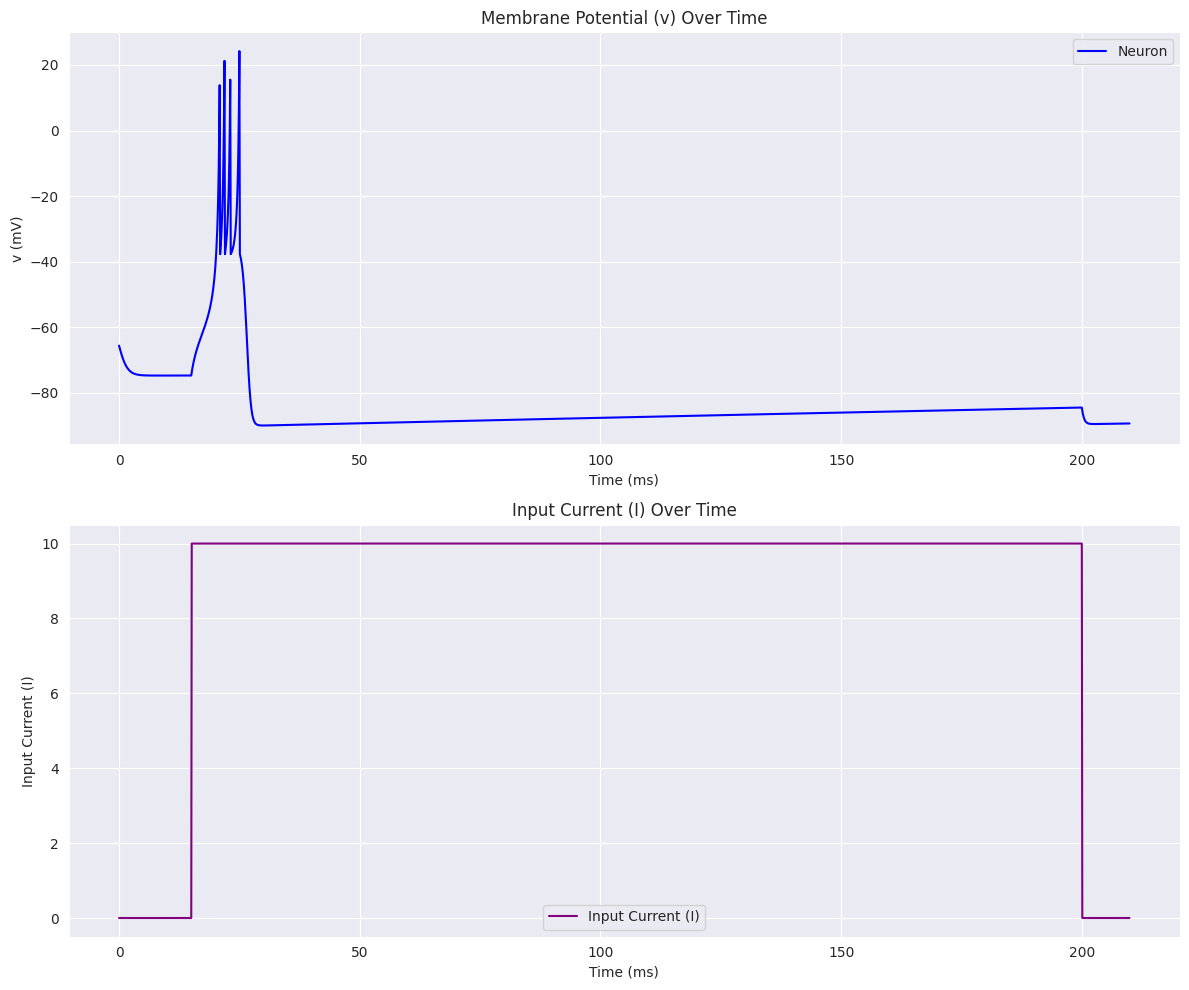

In [24]:
v_trace, u_trace = simulate_neuron(-40.909, 9.927, I) # regular firing

# Plotting results
plt.figure(figsize=(12, 10))

# plot of v vs t for regular firing
plt.subplot(2, 1, 1)
plt.plot(time, v_trace, label='Neuron', color='blue')
plt.xlabel('Time (ms)')
plt.ylabel('v (mV)')
plt.title('Membrane Potential (v) Over Time')
plt.legend()

# v_trace, u_trace = simulate_neuron(-55, 4, I) # Intrinsic Bursting
#
# # plot of v vs t for intrinsic bursting
# plt.subplot(3, 1, 2)
# plt.plot(time, v_trace, label='Neuron', color='blue')
# plt.xlabel('Time (ms)')
# plt.ylabel('v')
# plt.title('Membrane Potential (v) Over Time')
# plt.legend()

# plot of input current I
plt.subplot(2, 1, 2)
plt.plot(time, I, color='purple', label='Input Current (I)')
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (I)')
plt.title('Input Current (I) Over Time')
plt.legend()

plt.tight_layout()
plt.show()

---